In [0]:
! pip install shapely[vectorized]

    100% |████████████████████████████████| 1.5MB 12.6MB/s 


In [0]:
#3D- test maker

import numpy as np
import matplotlib.pyplot as plt

# Generating circle modulated by sin

#Curve parameters
r_max=1 # maximal distance from (0,0) point to the curve (between 0 and 1)
modulation=0.05 # amplitude of sin to the average radius of the circle ratio (between 0 and 1)
period= (2*np.pi)/5 # period of sin in radians

number_of_points=1000 # how many points are used in curve approximation

 
def make_xy_list(r_max, number_of_points=number_of_points):
    points_xy=[]
    
    r_0 = r_max/(1 + modulation) #average radius
    a = r_0*modulation #amplitude of sin
    freq = (2*np.pi)/period
    
    for fi in np.linspace(0, 2*np.pi, number_of_points):
        x , y = r_0 * (1 + a*np.sin(freq*fi))*np.cos(fi), r_0 * (1 + a*np.sin(freq*fi))*np.sin(fi)
        points_xy.append((x,y))
        
    return points_xy


def make_xyz_list(zrange=50):
    
    res = []
    theta = np.linspace(0, 1 , zrange)
    for t in theta:
          res.append(make_xy_list(r_max=np.sqrt(1-t**2), number_of_points=500))
            
    return res

In [0]:
#3D- evolver

from shapely.geometry import Polygon, MultiPolygon
import matplotlib.pyplot as plt
from numpy.random import choice



def make_polygon_list(layer_3D):
  
    #transform list of lists of points to list of Multipolygons
    polygons=[]
    for cross in layer_3D:
        polygons.append(MultiPolygon([Polygon(cross)]))
    return polygons
        
        
def make_new_layer_3D(old_layer, layer_width=0.1, l_distance=0.02):
  
    #l_distance- distance between crossections
    #old_layer- list of polygons
    #returns list of polygons
    #layer_width- layer growth in one step
    #returns list of polygons
    
    dist_max=int(np.floor(layer_width/l_distance)) # how many crossections are in the range of one layer
    zsize=len(old_layer) #how many xy layers
    new_layer=[] #list of polygons
    for i in range(zsize):
        crossection=old_layer[i]
        
        # growth of the actual layer
        cross_new=crossection.buffer(-layer_width)
        
        #now adding contribution from other layers
        
        lower_bound=max(0, i-dist_max)
        upper_bound=min(zsize, i+dist_max+1)
        
        #only layers between lower_bound and upper_bound contribute
        for j in range(lower_bound, upper_bound):
            dist = abs((j-i)*l_distance) #distance between i and j layer
            new_width_sq=layer_width**2- dist**2 #effective width of contribution of j layer
            if(new_width_sq>0):
                lj_contribution=old_layer[j].buffer(-np.sqrt(new_width_sq)) # contribution of j layer to i layer
                cross_new=cross_new.intersection(lj_contribution)
        new_layer.append(cross_new)
        
    return new_layer
  
def make_N_layers_3D(first_layer, layer_width=0.1, l_distance=0.02, N=8):

    #makes N layers in 3D
    #first_layer- list of polygons, initial layer
    #layer_width, l_distance- like in make_new_layer_3D
    #returns list of created layers
    
    layers_list = []
    layer = first_layer
    
    for i in range(N):
        layers_list.append(layer)
        layer=make_new_layer_3D(layer, layer_width, l_distance)
        
        
    return(layers_list)

def draw_crossection(layers_list, z):
  
    # draws crossection of list of 3D layers
    # z- number of layer to be drawn
    
    colours=['brown','lightblue','khaki','gold','lavender','tan','wheat','white','darkgray','beige','ivory']
    
    for layer in layers_list:
        mpolygon = layer[z]
        if(mpolygon.__class__.__name__=='Polygon'):
            mpolygon = MultiPolygon([mpolygon])
        for polygon in mpolygon: # z crossection

            x,y = polygon.exterior.xy
            plt.plot(x, y, choice(colours, 1)[0])
            plt.fill(x, y, choice(colours,1)[0])


In [0]:
#3D
list_of_cross = make_xyz_list()

first_layer = make_polygon_list(list_of_cross)


layers_list = make_N_layers_3D(first_layer)

10.0


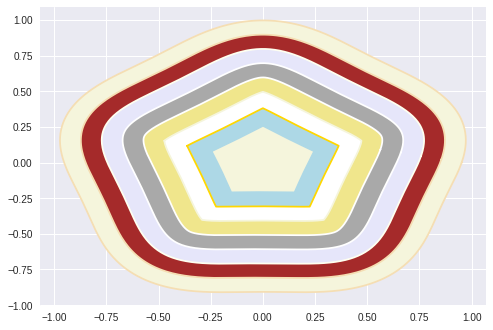

In [0]:
#3d- sphere
z=0
draw_crossection(layers_list, z)
dist=(1-z/50)/0.1
print(dist)